In [58]:
import numpy as np
import csv

In [87]:
file = open("ds-rice.csv", 'r')
csv_reader = csv.reader(file)

header = next(csv_reader)
#print(header)

Xrice, yrice = [], []
for features in csv_reader:
  yrice.append(features.pop(-1))
  Xrice.append(features)

Xrice = np.array(Xrice, dtype=float)
yrice = np.array(yrice, dtype=float)
Xrice.shape, yrice.shape

((18185, 11), (18185,))

In [60]:
file = open("ds-spam.csv", 'r')
csv_reader = csv.reader(file)

header = next(csv_reader)
#print(header)

Xspam, yspam = [], []
for features in csv_reader:
  yspam.append(features.pop(-1))
  Xspam.append(features)

Xspam = np.array(Xspam, dtype=float)
yspam = np.array(yspam, dtype=float)
Xspam.shape, yspam.shape

((4601, 57), (4601,))

In [61]:
file = open("ds-iris.csv", 'r')
csv_reader = csv.reader(file)

header = next(csv_reader)
#print(header)

X, y = [], []
for features in csv_reader:
  y.append(features.pop(-1))
  X.append(features)

new_y = []
num_class = -1
for i in range(len(y)):
  y_currently = y[i].strip()
  if y_currently == "Iris-setosa":
    num_class = 0
  elif y_currently =="Iris-versicolor":
    num_class = 1
  else: # "Iris-virginica"
    num_class = 2
  y[i] == num_class
  new_y.append(num_class)

y = new_y
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)
X.shape, y.shape

((150, 4), (150,))

In [62]:
combinacoes = 1
for i in range(X.shape[1]):
    valores = set(X[:,i])
    combinacoes *= len(valores)
    print(valores)
print(combinacoes)

{4.7, 5.5, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, 4.3, 5.8, 7.0, 7.1, 4.5, 5.9, 5.6, 6.9, 6.5, 6.4, 6.6, 6.0, 6.1, 7.6, 7.4, 7.9, 5.7, 5.3, 5.2, 6.3, 6.7, 6.2, 6.8, 7.3, 7.2, 7.7}
{2.9, 3.0, 3.5, 3.2, 3.6, 3.1, 3.9, 3.4, 3.7, 4.0, 4.4, 4.1, 2.0, 2.5, 2.6, 2.3, 2.8, 2.7, 2.2, 3.8, 3.3, 4.2, 2.4}
{1.7, 1.4, 1.6, 1.3, 1.5, 1.1, 1.2, 1.0, 1.9, 4.7, 4.5, 4.9, 4.0, 5.0, 6.0, 3.5, 3.0, 4.6, 4.4, 4.1, 5.1, 5.9, 5.6, 5.5, 5.4, 6.6, 6.1, 6.9, 6.4, 3.6, 3.3, 3.8, 3.7, 4.2, 4.8, 4.3, 5.8, 5.3, 5.7, 5.2, 6.3, 6.7, 3.9}
{0.2, 0.4, 0.3, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1.0, 1.1, 2.5, 2.0, 2.1, 1.2, 1.7, 0.1, 2.2, 2.3, 1.8, 1.9, 2.4}
761530


In [63]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class ZeroR():
    def fit(self, X, y):
        self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]), dtype='<U5')
        y[:] = self.resposta
        return y

modelo = ZeroR()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(0.0, False)

In [64]:
def impureza(y): #Gini
    labels = list(set(y))
    labels.sort()
    probabilidades = np.zeros((len(labels),))
    for i,k in enumerate(labels):
        probabilidades[i] = sum(y==k)/len(y)
    result = 1 - sum(probabilidades**2)
    return result

ytmp = y[:]
valor = impureza(ytmp)
valor

0.6666666666666667

In [65]:
def impurezaValor(x, y, valor):
    iguais = x==valor
    impurezaIguais = impureza(y[iguais])
    print(iguais)
    propIguais = sum(iguais)/len(y)
    impurezaDiferentes = impureza(y[~iguais])
    propDiferentes = sum(~iguais)/len(y)
    impurezaTotal = propIguais*impurezaIguais + propDiferentes*impurezaDiferentes
    return impurezaTotal
print(X[:,0])
impurezaValor(X[:,0],y, 4.7)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False F

0.6576576576576576

In [66]:
def impurezaMaxima(X, y):
    impurezas = []
    caracteristicasValores = []
    for i in range(X.shape[1]):
        valores = sorted(list(set(X[:,i])))
        for valor in valores:
            caracteristicasValores.append([i,valor])
            impurezasValorCaracteristica = impurezaValor(X[:,i], y, valor)
            impurezas.append(impurezasValorCaracteristica)
    caracteristicasValores = np.array(caracteristicasValores)
    impurezas = np.array(impurezas)
    menorimpureza = np.argmax(impurezas)
    caracteristica, valor = caracteristicasValores[menorimpureza]
    return impurezas[menorimpureza], int(caracteristica), valor
impurezaMaxima(X, y)

[False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[False False False False False False False False  True False False False
 False False 

(0.6654589371980677, 1, 3.1)

In [67]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.impureza,self.caracteristica,self.valor = impurezaMaxima(X,y)
        iguais = X[:,self.caracteristica] == self.valor
        if sum(iguais)>0 and sum(~iguais)>0:
            self.iguais = Arvore()
            self.iguais.fit(X[iguais,:],y[iguais])
            self.diferentes = Arvore()
            self.diferentes.fit(X[~iguais,:],y[~iguais])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]), dtype='<U5')
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            iguais = X[:,self.caracteristica] == self.valor
            y[iguais] = self.iguais.predict(X[iguais,:])
            y[~iguais] = self.diferentes.predict(X[~iguais,:])
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

Streaming output truncated to the last 5000 lines.
  True  True False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False F

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(0.0, False)

In [68]:
from sklearn.model_selection import cross_validate

scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

Streaming output truncated to the last 5000 lines.
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
[False False False  True False False False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False False False False False]
[False False False False False False False False False False  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
[False False  True False False False False False  True False False False
 False False False  True False False False False False False False Fal

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False]
[False False F

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False False False False False False False False False]
[False False  True False False False False False False False False False
 False False  True  True False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False]
[ True False False False False False False  True  True False False False
 False  True False False  True False  True False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False]
[False  True False  True False False  True False False  True False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False F

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False False False False False False False False False False  True
 False  True False False False False False False False False False False
 False  True  True False False  True  True False False False]
[False False False False False False False False False False False False
 False False False False  True False False  True  True False False False
 False False  True  True False  True False False  True False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True False False False False
 False False False False  True False False  True False False]
[False False  True False  True False False False  True False  True  True
 False False False False False False False False False False False False
 False False False False False Fa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False False False False False False False False False False  True
 False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False  True False False False False
 False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False]
[False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


(array([0., 0., 0., 0., 0.]), 0.0)

In [69]:
def impurezaMinima(X, y):
    impurezas = []
    caracteristicasValores = []
    for i in range(X.shape[1]):
        valores = sorted(list(set(X[:,i])))
        for valor in valores:
            caracteristicasValores.append([i,valor])
            impurezasValorCaracteristica = impurezaValor(X[:,i], y, valor)
            impurezas.append(impurezasValorCaracteristica)
    caracteristicasValores = np.array(caracteristicasValores)
    impurezas = np.array(impurezas)
    menorimpureza = np.argmin(impurezas)
    caracteristica, valor = caracteristicasValores[menorimpureza]
    return impurezas[menorimpureza], int(caracteristica), valor
impurezaMinima(X, y)

[False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[False False False False False False False False  True False False False
 False False 

(0.5136612021857923, 3, 0.2)

In [70]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.impureza,self.caracteristica,self.valor = impurezaMinima(X,y)
        iguais = X[:,self.caracteristica] == self.valor
        if sum(iguais)>0 and sum(~iguais)>0:
            self.iguais = Arvore()
            self.iguais.fit(X[iguais,:],y[iguais])
            self.diferentes = Arvore()
            self.diferentes.fit(X[~iguais,:],y[~iguais])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]), dtype='<U5')
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            iguais = X[:,self.caracteristica] == self.valor
            y[iguais] = self.iguais.predict(X[iguais,:])
            y[~iguais] = self.diferentes.predict(X[~iguais,:])
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

Streaming output truncated to the last 5000 lines.
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False Fa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(0.0, False)

In [71]:
from sklearn.model_selection import cross_validate

scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

Streaming output truncated to the last 5000 lines.
 False False False False False False False]
[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[False False False False False False False False  True False  True False
 False False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False F

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False False False  True False False False  True False False False
 False False False False False False False False False False False False
 False False False  True False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False  True False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False]
[False False False False False False False False Fa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False  True  True False  True False False False  True False False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False F

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
 False False  True False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False]
[False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False Fa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Streaming output truncated to the last 5000 lines.
[False  True]
[ True False]
[False  True]
[ True False]
[ True False]
[False  True]
[ True  True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[False False  True False False False False False False False False False
 False False False False False False False

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


(array([0., 0., 0., 0., 0.]), 0.0)

# Árvore para atributos contínuos

In [72]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data[:,2:], iris.target

In [73]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class ZeroR():
    def fit(self, X, y):
        self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        y[:] = self.resposta
        return y

modelo = ZeroR()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.3333333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

In [74]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.caracteristica = 0
    def fit(self, X, y):
        self.valor = np.mean(X[:,self.caracteristica])
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores)>0 and sum(~maiores)>0:
            self.maiores = Arvore()
            self.maiores.fit(X[maiores,:],y[maiores])
            self.menores = Arvore()
            self.menores.fit(X[~maiores,:],y[~maiores])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            maiores = X[:,self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores,:])
            y[~maiores] = self.menores.predict(X[~maiores,:])
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9533333333333334,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

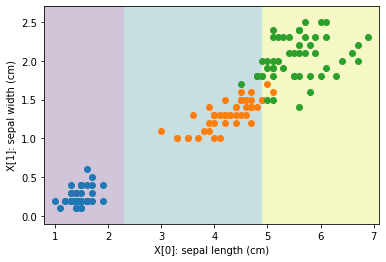

In [75]:
import matplotlib.pyplot as plt

def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100)
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{iris.target_names[k]} [{k}]")
    plt.xlabel(f"X[0]: {iris.feature_names[0]}")
    plt.ylabel(f"X[1]: {iris.feature_names[1]}")
    plt.show()

plotDecisao(Arvore(), X, y)

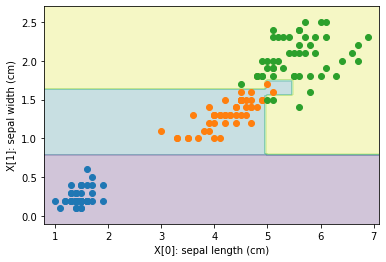

In [76]:
from sklearn.tree import DecisionTreeClassifier
plotDecisao(DecisionTreeClassifier(), X, y)

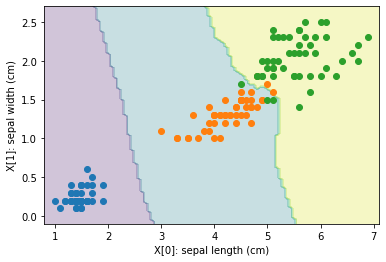

In [77]:
from sklearn.neighbors import KNeighborsClassifier
plotDecisao(KNeighborsClassifier(), X, y)

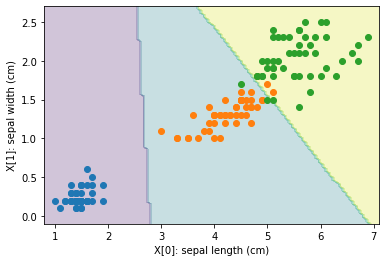

In [78]:
from sklearn.linear_model import LogisticRegression
plotDecisao(LogisticRegression(), X, y)

# Escolhendo a melhor característica

In [79]:
def impureza(y): #Gini
    labels = list(set(y))
    labels.sort()
    probabilidades = np.zeros((len(labels),))
    for i,k in enumerate(labels):
        probabilidades[i] = sum(y==k)/len(y)
    result = 1 - sum(probabilidades**2)
    return result

ytmp = y[:]
valor = impureza(ytmp)
valor

0.6666666666666667

In [80]:
def impurezaValor(x, y, valor):
    maiores = x>valor
    impurezaMaiores = impureza(y[maiores])
    propMaiores = sum(maiores)/len(y)
    impurezaMenores = impureza(y[~maiores])
    propMenores = sum(~maiores)/len(y)
    impurezaTotal = propMaiores*impurezaMaiores + propMenores*impurezaMenores
    return impurezaTotal, impurezaMaiores, impurezaMenores
impurezaValor(X[:,0], y, 2.5)    

(0.3333333333333333, 0.5, 0.0)

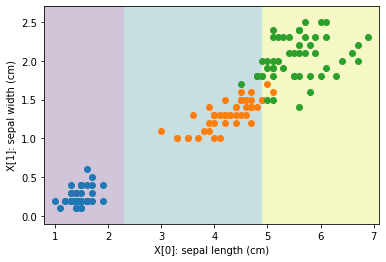

In [81]:
plotDecisao(Arvore(),X,y)

In [82]:
def melhorValor(x, y):
    result = None
    menorImpureza = float('inf')
    xmax = np.max(x)
    xmin = np.min(x)
    while True:
        valor = (xmin+xmax)/2
        impTotal, impMaiores, impMenores = impurezaValor(x, y, valor)
        if impTotal < menorImpureza:
            menorImpureza = impTotal
            result = valor
            if impMaiores == 0 or impMenores == 0:
                break
            if impMaiores < impMenores:
                xmin = valor
            else:
                xmax = valor
        else:
            break
    return result, menorImpureza
melhorValor(X[:,0], y)

(2.475, 0.3333333333333333)

In [83]:
def melhorCaracteristica(X, y):
    impurezas = []
    valores = []
    for caracteristica in range(X.shape[1]):
        valor, imp = melhorValor(X[:,caracteristica], y)
        impurezas.append(imp)
        valores.append(valor)
    impurezas = np.array(impurezas)
    caracteristica = np.argmin(impurezas)
    return caracteristica, valores[caracteristica], impurezas[caracteristica]
print(melhorCaracteristica(X,y))

(0, 2.475, 0.3333333333333333)


In [84]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.caracteristica, self.valor, self.imp = melhorCaracteristica(X,y)
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores)>0 and sum(~maiores)>0:
            self.maiores = Arvore()
            self.maiores.fit(X[maiores,:],y[maiores])
            self.menores = Arvore()
            self.menores.fit(X[~maiores,:],y[~maiores])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            maiores = X[:,self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores,:])
            y[~maiores] = self.menores.predict(X[~maiores,:])
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9933333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

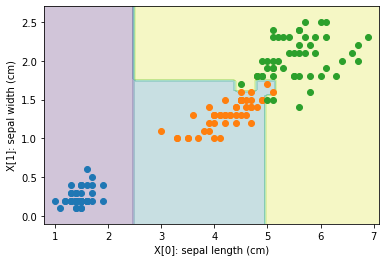

In [85]:
plotDecisao(Arvore(), X, y)

In [86]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]),
 0.9533333333333334)